In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
import itertools
from IPython.display import display

plt.rcParams['figure.figsize'] = [14, 8]

In [5]:
base_path = "../results/"
envs = [
    "AreaMinimizer-v0",
#     "Carrier-v0",
    "Climber-v2",
##     "ObstacleTraverser-v1",
    "UpStepper-v0",
##     "Balancer-v1",
##     "Climber-v0",
#     "Flipper-v0",
    "Thrower-v0",
    "Walker-v0"
]

tests = [
    "run_1_table.csv",
    "run_CPPN_1_table.csv",
    "run_altSpec_1_table.csv"
] 

col_names = []

dfs = {}
for env in envs:
    dfs[env] = {t: None for t in tests}
    for t in tests:
        file_name = base_path + env + "/" + t
        df = pd.read_csv(file_name, sep=';')
        dfs[env][t] = (df)
        col_names = df.columns[1:]
            
dfs[env][t].head(2)

,pop_size,best_fit,num_species
0,128,3.764716,34
1,135,3.768720,34


In [6]:
def plot_graphs(dfs, test_names, gen_range, col):
    for t in test_names:
        test = dfs[t]
        steps = [i for i in range(gen_range[0], gen_range[1])]

        avg_arr = []
        min_arr = []
        max_arr = []

        for row in steps:
            if len(test[col]) > row:
                values = [test[col][row]]
            else:
                values = [0]
            
            avg_arr.append(sum(values)/len(values))
            min_arr.append(min(values))
            max_arr.append(max(values))

        plt.plot(steps, avg_arr, lw =1.3, label=t)
        plt.fill_between(steps, min_arr,max_arr, alpha = 0.15)

        
    plt.xlabel("Generations")
    plt.ylabel(col)
    plt.legend(loc="upper left")
    plt.show()

!!!!!!!!!!!!!!!!!!!!!!AreaMinimizer-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


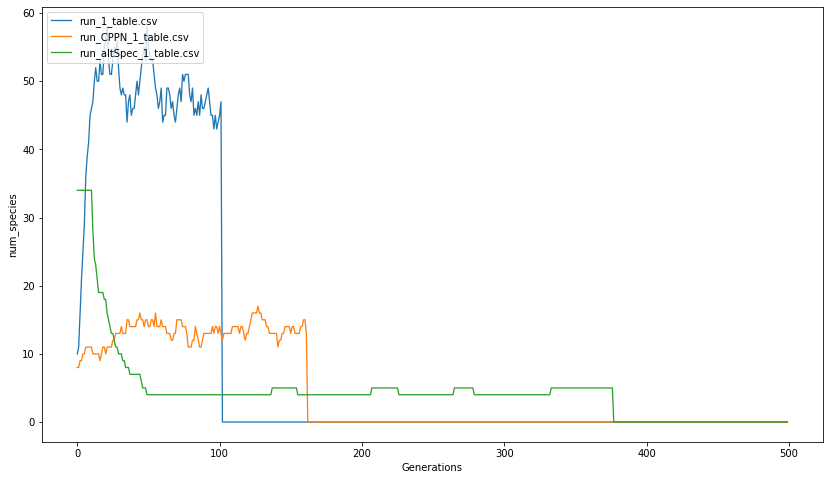

!!!!!!!!!!!!!!!!!!!!!!Climber-v2!!!!!!!!!!!!!!!!!!!!!!!!!!


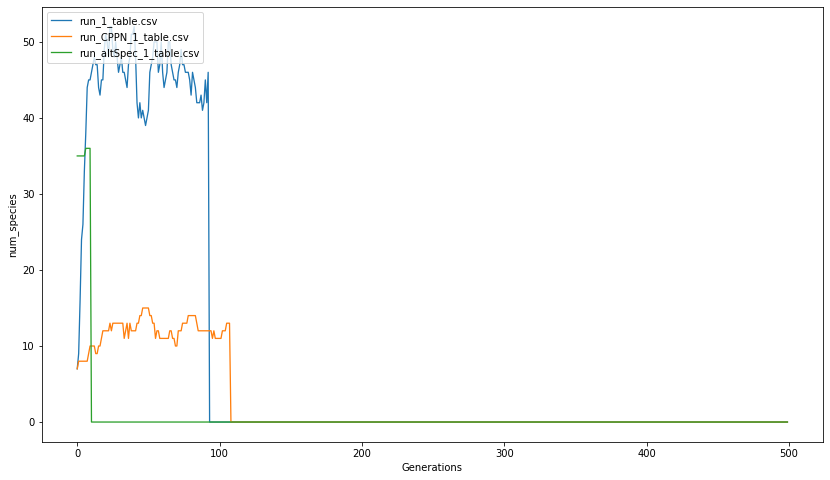

!!!!!!!!!!!!!!!!!!!!!!UpStepper-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


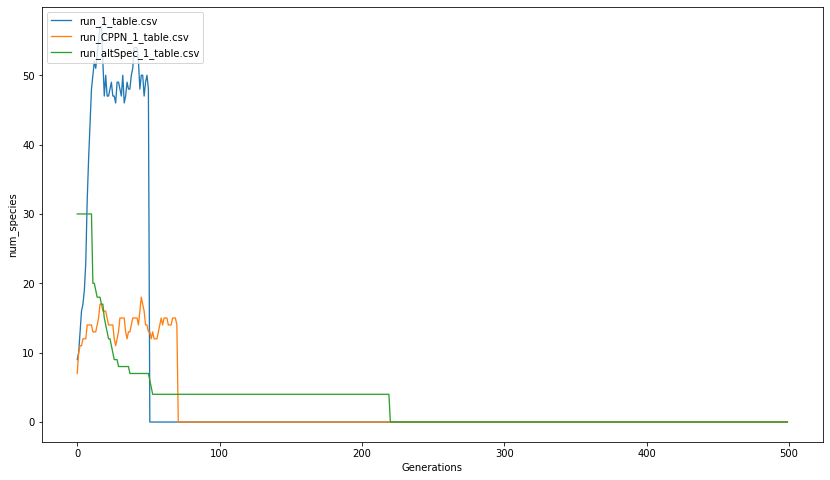

!!!!!!!!!!!!!!!!!!!!!!Thrower-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


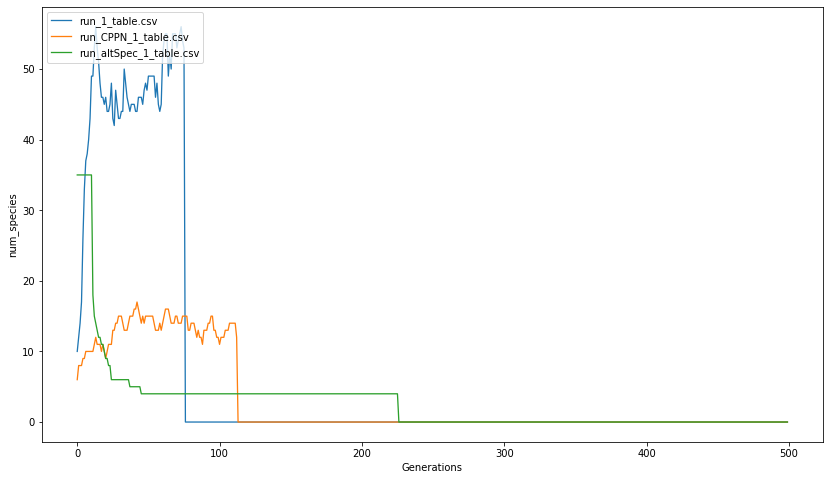

!!!!!!!!!!!!!!!!!!!!!!Walker-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


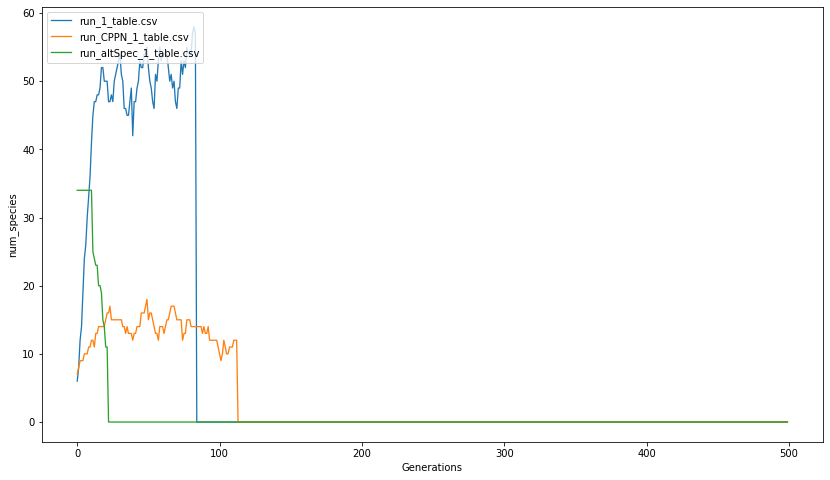

In [8]:
cols = ['pop_size', 'best_fit', 'num_species']

for e in envs:
    print(f"!!!!!!!!!!!!!!!!!!!!!!{e}!!!!!!!!!!!!!!!!!!!!!!!!!!")
    plot_graphs(dfs[e], tests, [0, 500], "num_species")